In [1]:
import yfinance as yf
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np 
import pandas as pd
import time
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = yf.download("^NSEI", start='2014-01-01', end=datetime.now().strftime("%Y-%m-%d")).reset_index()
print('data fields downloaded:', set(df.columns.get_level_values(0)))


[*********************100%%**********************]  1 of 1 completed

data fields downloaded: {'Date', 'Adj Close', 'Close', 'High', 'Volume', 'Low', 'Open'}


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2505 non-null   datetime64[ns]
 1   Open       2505 non-null   float64       
 2   High       2505 non-null   float64       
 3   Low        2505 non-null   float64       
 4   Close      2505 non-null   float64       
 5   Adj Close  2505 non-null   float64       
 6   Volume     2505 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.1 KB


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,6301.250000,6358.299805,6211.299805,6221.149902,6221.149902,158100
1,2014-01-03,6194.549805,6221.700195,6171.250000,6211.149902,6211.149902,139000
2,2014-01-06,6220.850098,6224.700195,6170.250000,6191.450195,6191.450195,118300
3,2014-01-07,6203.899902,6221.500000,6144.750000,6162.250000,6162.250000,138600
4,2014-01-08,6178.049805,6192.100098,6160.350098,6174.600098,6174.600098,146900


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df["Date"].min(), df["Date"].max()

(Timestamp('2014-01-02 00:00:00'), Timestamp('2024-03-15 00:00:00'))

In [6]:
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,6301.250000,6358.299805,6211.299805,6221.149902,6221.149902,158100
2014-01-03,6194.549805,6221.700195,6171.250000,6211.149902,6211.149902,139000
2014-01-06,6220.850098,6224.700195,6170.250000,6191.450195,6191.450195,118300
2014-01-07,6203.899902,6221.500000,6144.750000,6162.250000,6162.250000,138600
2014-01-08,6178.049805,6192.100098,6160.350098,6174.600098,6174.600098,146900


Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

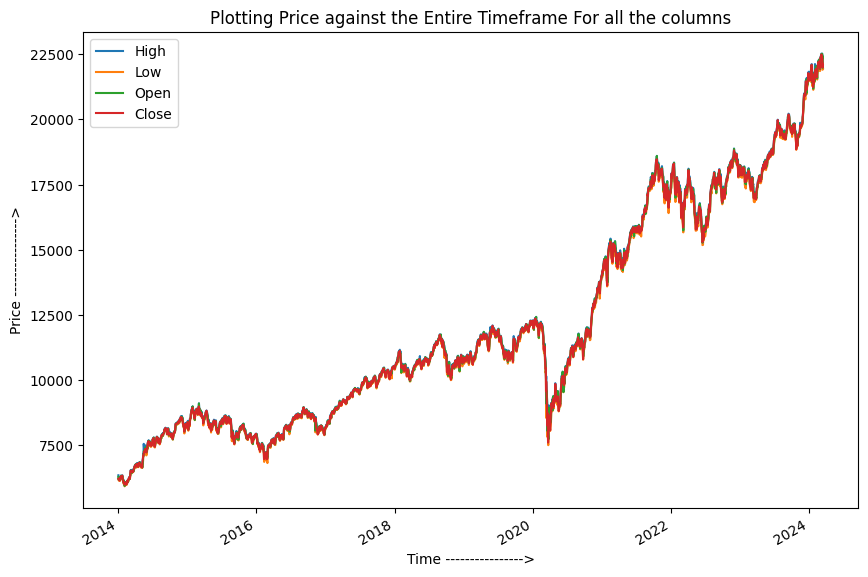

In [7]:
df[["High", "Low", "Open", "Close"]].plot(figsize=(10,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For HIGH column')

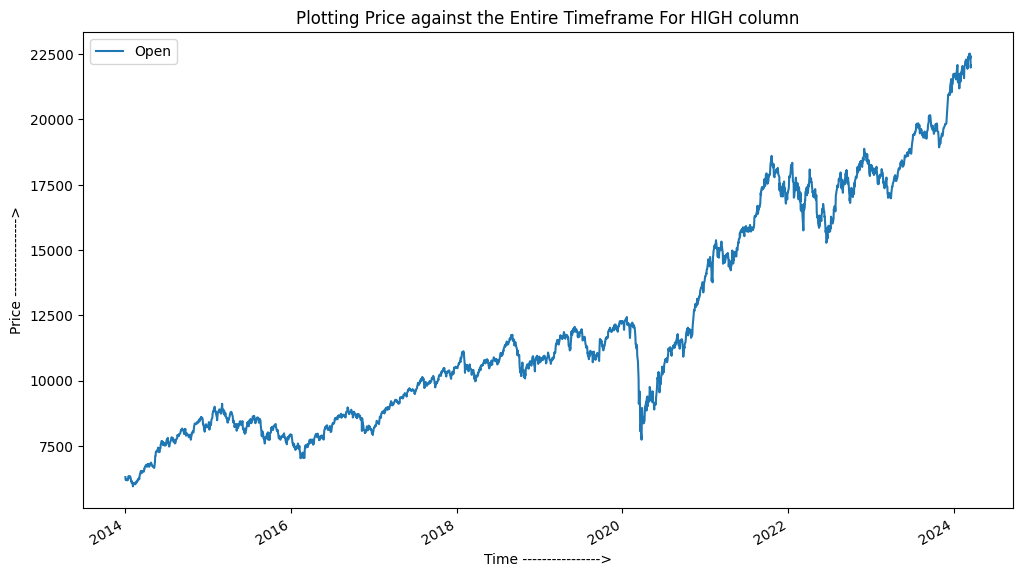

In [8]:
plt.figure(figsize=(12,7))
df["Open"].plot()
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For HIGH column")

In [9]:
new_df = pd.DataFrame(df["Open"].copy(), columns=["Open"])
new_df.head()

,Open
Date,
2014-01-02,6301.250000
2014-01-03,6194.549805
2014-01-06,6220.850098
2014-01-07,6203.899902
2014-01-08,6178.049805


In [10]:
train_size = int(len(new_df)*0.8)
train = new_df.iloc[0:train_size]
test = new_df.iloc[train_size:len(new_df)]

In [11]:
len(train), len(test)

(2004, 501)